# Mall Customer Segmentation

### Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

### Load the data

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Map the data

In [18]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### Plot the data

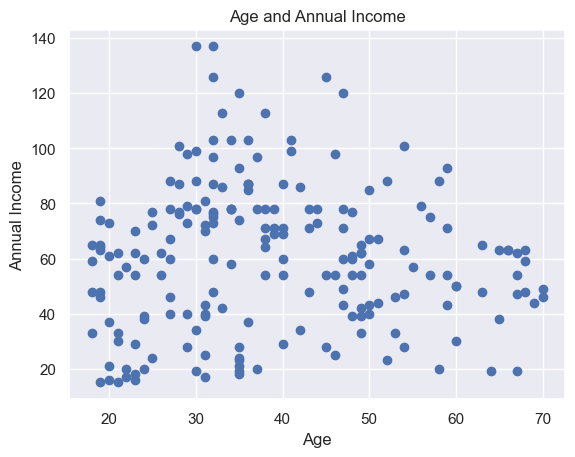

In [4]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.title('Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

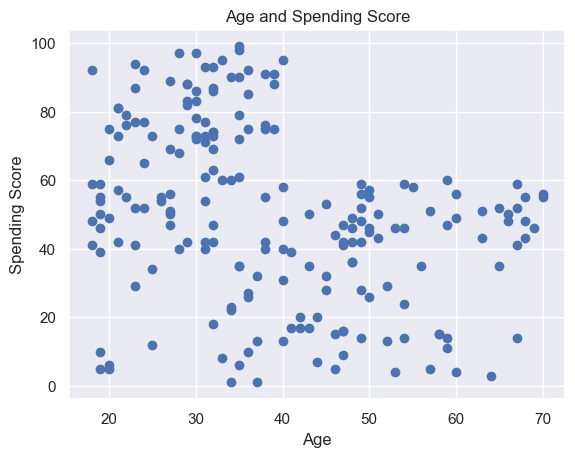

In [5]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.title('Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

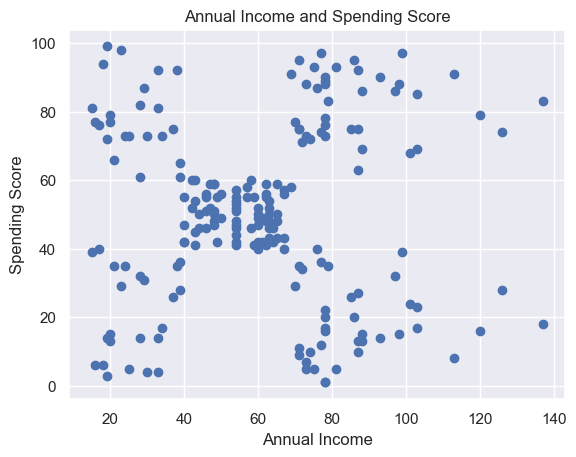

In [6]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.title('Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Select the features

#### Age and Annual Income

In [7]:
x = data.iloc[:,2:4]
x

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


#### Age and Spending Score

In [36]:
y = data.drop(['Annual Income (k$)', 'Gender', 'CustomerID'],axis=1)
y

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### Annual Income and Spending Score

In [41]:
z = data.iloc[:,3:5]
z

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Clustering

#### Age and Annual Income

In [43]:
kmeans_x = KMeans(2)
kmeans_x.fit(x)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

#### Age and Spending Score

In [44]:
kmeans_y = KMeans(2)
kmeans_y.fit(y)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

#### Annual Income and Spending Score

In [45]:
kmeans_z = KMeans(2)
kmeans_z.fit(z)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

### Clustering results

#### Age and Annual Income

In [52]:
clusters_x = x.copy()
clusters_x['clustering_pred_x'] = kmeans_x.fit_predict(x)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


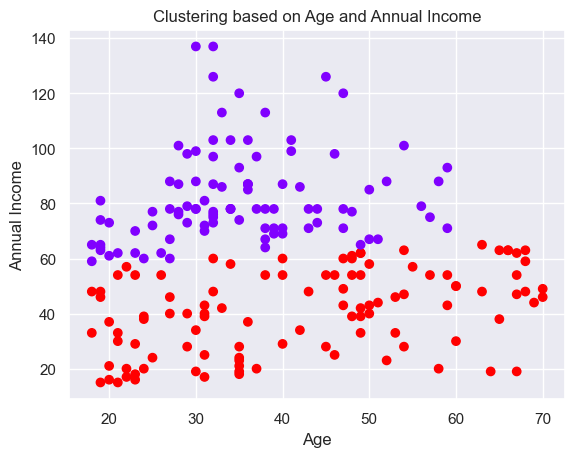

In [53]:
plt.scatter(data['Age'],data['Annual Income (k$)'], c=clusters_x['clustering_pred_x'], cmap='rainbow')
plt.title('Clustering based on Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#### Age and Spending Score

In [48]:
clusters_y = y.copy()
clusters_y['clustering_pred_y'] = kmeans_y.fit_predict(y)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


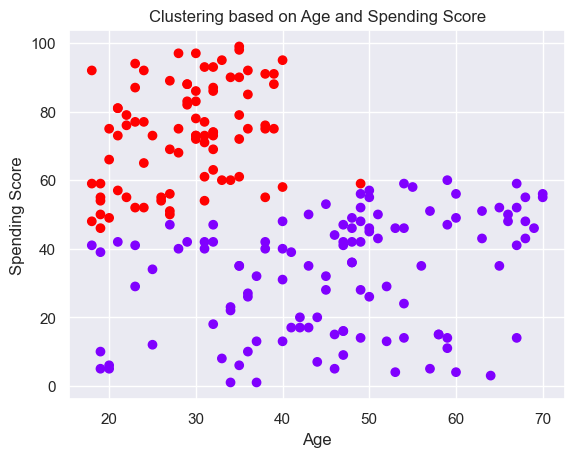

In [49]:
plt.scatter(data['Age'],data['Spending Score (1-100)'], c=clusters_y['clustering_pred_y'], cmap='rainbow')
plt.title('Clustering based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### Annual Income and Spending Score

In [50]:
clusters_z = z.copy()
clusters_z['clustering_pred_z'] = kmeans_z.fit_predict(z)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


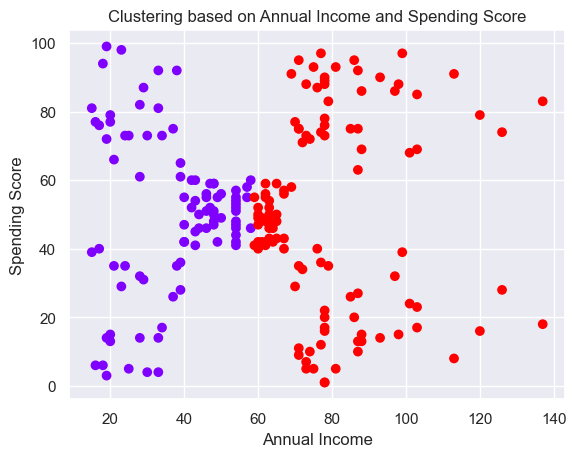

In [51]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c=clusters_z['clustering_pred_z'], cmap='rainbow')
plt.title('Clustering based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Standarize the variables

#### Age and Annual Income

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

#### Age and Spending Score

In [54]:
from sklearn import preprocessing
y_scaled = preprocessing.scale(y)
y_scaled

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

#### Annual Income and Spending Score

In [55]:
from sklearn import preprocessing
z_scaled = preprocessing.scale(z)
z_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Elbow method

#### Age and Annual Income

In [60]:
wcss_x =[]

for i in range(1,10):
    kmeans_x = KMeans(i)
    kmeans_x.fit(x_scaled)
    wcss_x.append(kmeans_x.inertia_)
    
wcss_x

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

[400.00000000000006,
 250.58811570754693,
 132.85530421221918,
 103.05151849277249,
 81.36230859173126,
 67.36900484698116,
 54.201348440427005,
 48.18934667767799,
 41.70019920652932]

Text(0, 0.5, 'WCSS')

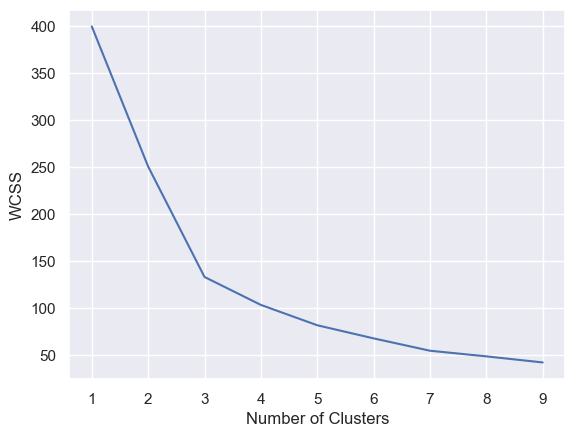

In [61]:
plt.plot(range(1,10),wcss_x)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

#### Age and Spending Score

In [56]:
wcss_y =[]

for i in range(1,10):
    kmeans_y = KMeans(i)
    kmeans_y.fit(y_scaled)
    wcss_y.append(kmeans_y.inertia_)
    
wcss_y

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

[400.0,
 189.38749033992428,
 124.32628617921526,
 89.76521676586152,
 71.09364141459413,
 53.128438356294005,
 45.93710975245889,
 39.73753942989694,
 33.78036535262723]

Text(0, 0.5, 'WCSS')

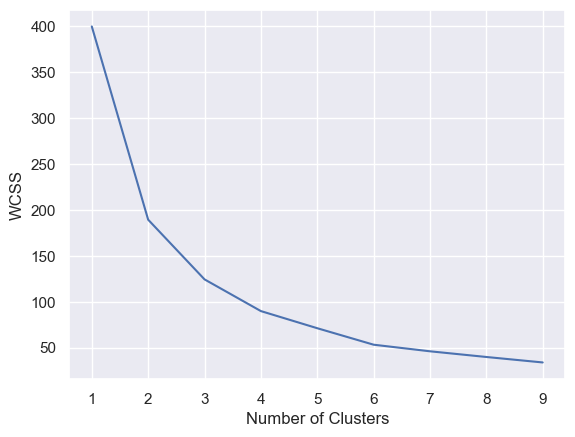

In [57]:
plt.plot(range(1,10),wcss_y)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### Annual Income and Spending Score

In [58]:
wcss_z =[]

for i in range(1,10):
    kmeans_z = KMeans(i)
    kmeans_z.fit(z_scaled)
    wcss_z.append(kmeans_z.inertia_)
    
wcss_z

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

[400.0,
 269.1425070447921,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.24595372674166,
 32.377243774440345]

Text(0, 0.5, 'WCSS')

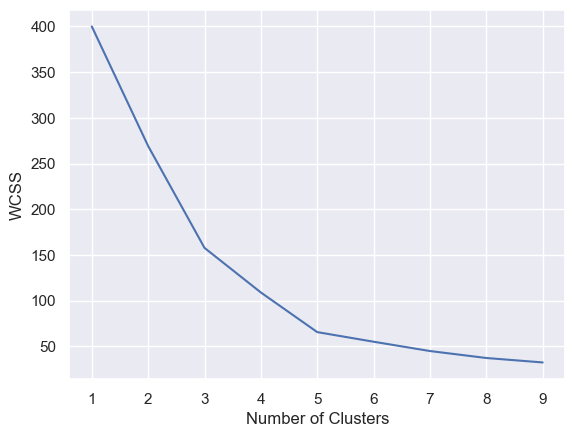

In [59]:
plt.plot(range(1,10),wcss_z)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### Explore clustering solutions and select the number of clusters

#### Age and Annual Income

In [62]:
kmeans_new_x = KMeans(5)
kmeans_new_x.fit(x_scaled)
clusters_new_x = x.copy()
clusters_new_x['cluster_pred_x'] = kmeans_new_x.fit_predict(x_scaled)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
clusters_new_x

,Age,Annual Income (k$),cluster_pred_x
0,19,15,0
1,21,15,0
2,20,16,0
3,23,16,0
4,31,17,0
...,...,...,...
195,35,120,2
196,45,126,2
197,32,126,2
198,32,137,2


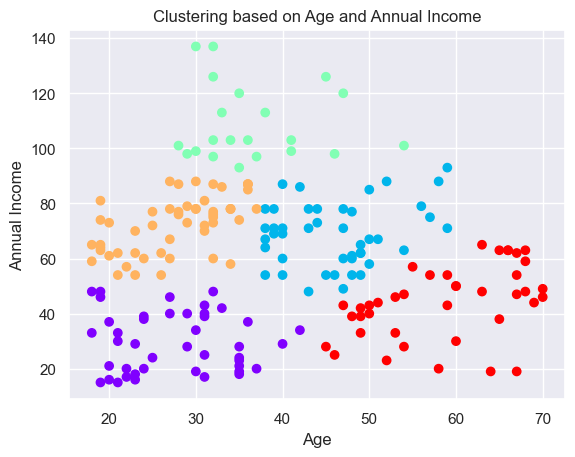

In [64]:
plt.scatter(data['Age'],data['Annual Income (k$)'], c=clusters_new_x['cluster_pred_x'], cmap='rainbow')
plt.title('Clustering based on Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#### Age and Spending Score

In [65]:
kmeans_new_y = KMeans(5)
kmeans_new_y.fit(y_scaled)
clusters_new_y = y.copy()
clusters_new_y['cluster_pred_y'] = kmeans_new_y.fit_predict(y_scaled)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
clusters_new_y

,Age,Spending Score (1-100),cluster_pred_y
0,19,39,3
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,3
...,...,...,...
195,35,79,0
196,45,28,2
197,32,74,0
198,32,18,2


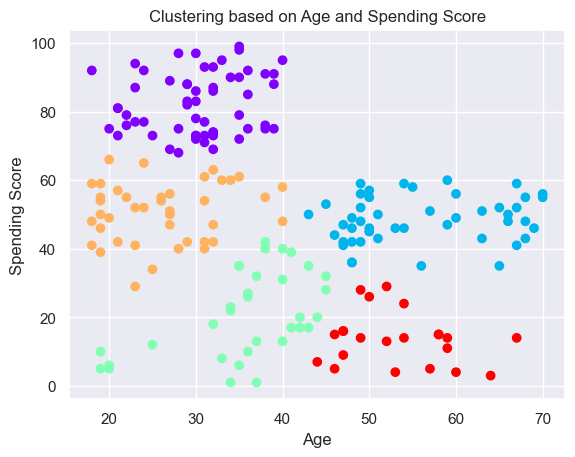

In [67]:
plt.scatter(data['Age'],data['Spending Score (1-100)'], c=clusters_new_y['cluster_pred_y'], cmap='rainbow')
plt.title('Clustering based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### Annual Income and Spending Score

In [68]:
kmeans_new_z = KMeans(5)
kmeans_new_z.fit(z_scaled)
clusters_new_z = z.copy()
clusters_new_z['cluster_pred_z'] = kmeans_new_z.fit_predict(z_scaled)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
clusters_new_z

,Annual Income (k$),Spending Score (1-100),cluster_pred_z
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


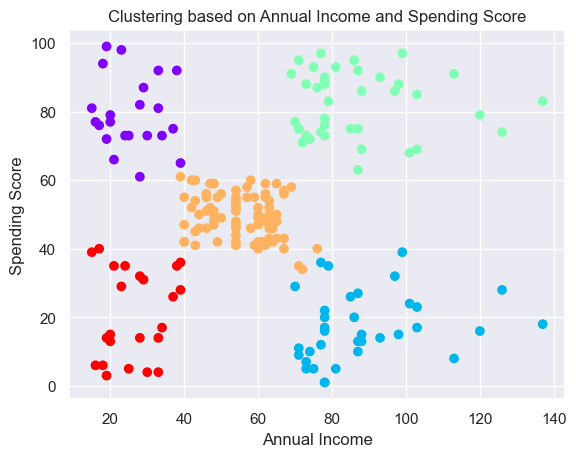

In [71]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c=clusters_new_z['cluster_pred_z'], cmap='rainbow')
plt.title('Clustering based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Interpretation of Plot 

### Age and Annual Income

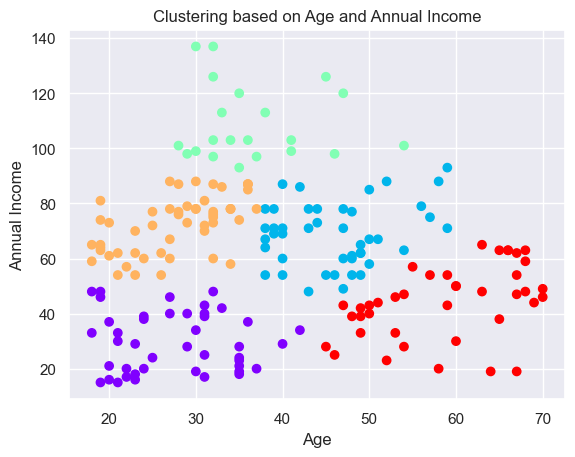

In [72]:
plt.scatter(data['Age'],data['Annual Income (k$)'], c=clusters_new_x['cluster_pred_x'], cmap='rainbow')
plt.title('Clustering based on Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#### Interpretation : 
1. There is 5 Cluster in this plot
2. Red = Person who have age in between 45 - 70 and have annual income between 20k - 62k (Middle class aged people)
3. Green = Person who have age in between 28 - 54 and have annual income between 88k - 138k (High class parent)
4. Blue = Person who have age in between 38 - 59 and have annual income between 48k - 94k (Middle class parent)
5. Orange = Person who have age in between 18 - 37 and have annual income between 56k - 90k (Middle class young people)
6. Purple = Person who have age in between 18 - 42 and have annual income between 16k - 48k (Low class young people)

### Age and Spending Score

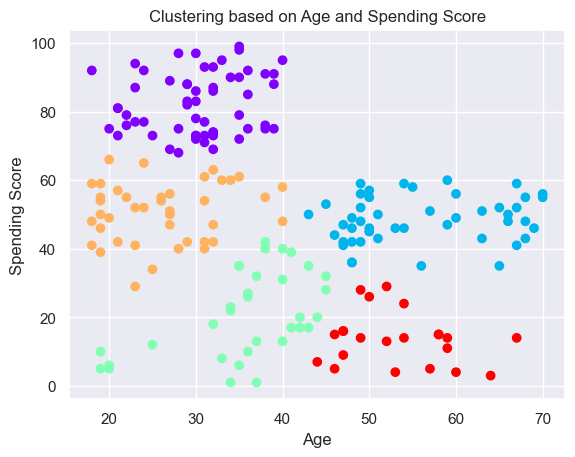

In [73]:
plt.scatter(data['Age'],data['Spending Score (1-100)'], c=clusters_new_y['cluster_pred_y'], cmap='rainbow')
plt.title('Clustering based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### Interpretation : 
1. There is 5 Cluster in this plot
2. Red = Person who have age in between 44 - 68 and have spending score between 4 - 28 (Low Spender Parent)
3. Green = Person who have age in between 19 - 45 and have spending score between 2 - 42 (Low Spender young people)
4. Blue = Person who have age in between 43 - 70 and have spending score between 36 - 59 (Middle Spender aged people)
5. Orange = Person who have age in between 17 - 40 and have spending score between 28 - 65 (Middle Spender young people)
6. Purple = Person who have age in between 18 - 40 and have spending score between 68 - 99 (High Spender young people)

### Annual Income and Spending Score

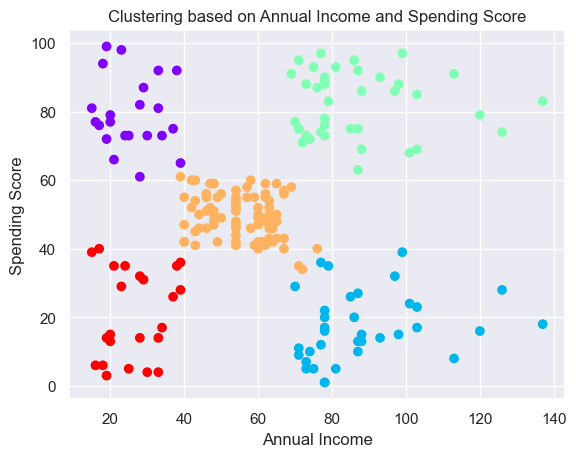

In [74]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], c=clusters_new_z['cluster_pred_z'], cmap='rainbow')
plt.title('Clustering based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Interpretation : 
1. There is 5 Cluster in this plot
2. Red = Person who have annual income between 16k - 39k and have spending score between 4 - 40 (Low Class - Low Spender)
3. Green = Person who have annual income between 68k - 136k and have spending score between 62 - 98 (High Class - High Spender)
4. Blue = Person who have annual income between 70k - 138k and have spending score between 1 - 39 (High Class - Low Spender)
5. Orange = Person who have annual income between 39k - 77k and have spending score between 34 - 60 (Middle Class- Middle Spender)
6. Purple = Person who have annual income between 16k - 39k and have spending score between 61 - 99 (Low Class - High Spender)